# Task 6.2 Final - Exploring Relationships

This script contains the following points:
1. Importing Visualization Libraries & Data
2. Data Cleaning
3. Exploring Relationships
4. Exporting Data

## 1. Importing Visualization Libraries & Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.8.4'

In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
path = r'C:\Users\Barb\19-09-2024 Gun Violence Data'

In [9]:
df_gun = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'df_gun6-1.csv'), index_col = 0)

### 1.1 Check shape and columns of imported data

In [11]:
df_gun.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [14]:
df_gun.shape

(239677, 29)

## 2. Data Cleaning

In [17]:
df_gun.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

### 2.1 Drop unnecessary columns

In [20]:
df_gun = df_gun.drop(columns=['incident_id','address','incident_url','source_url','incident_url_fields_missing','congressional_district','latitude','longitude'])

In [22]:
df_gun.dtypes

date                         object
state                        object
city_or_county               object
n_killed                      int64
n_injured                     int64
gun_stolen                   object
gun_type                     object
incident_characteristics     object
location_description         object
n_guns_involved             float64
notes                        object
participant_age              object
participant_age_group        object
participant_gender           object
participant_name             object
participant_relationship     object
participant_status           object
participant_type             object
sources                      object
state_house_district        float64
state_senate_district       float64
dtype: object

In [24]:
df_gun = df_gun.drop(columns=['location_description','participant_age_group','sources','state_house_district','state_senate_district'])

In [26]:
df_gun.dtypes

date                         object
state                        object
city_or_county               object
n_killed                      int64
n_injured                     int64
gun_stolen                   object
gun_type                     object
incident_characteristics     object
n_guns_involved             float64
notes                        object
participant_age              object
participant_gender           object
participant_name             object
participant_relationship     object
participant_status           object
participant_type             object
dtype: object

In [28]:
df_gun.head

<bound method NDFrame.head of              date           state city_or_county  n_killed  n_injured  \
0        1/1/2013    Pennsylvania     Mckeesport         0          4   
1        1/1/2013      California      Hawthorne         1          3   
2        1/1/2013            Ohio         Lorain         1          3   
3        1/5/2013        Colorado         Aurora         4          0   
4        1/7/2013  North Carolina     Greensboro         2          2   
...           ...             ...            ...       ...        ...   
239672  3/31/2018       Louisiana          Rayne         0          0   
239673  3/31/2018       Louisiana   Natchitoches         1          0   
239674  3/31/2018       Louisiana         Gretna         0          1   
239675  3/31/2018           Texas        Houston         1          0   
239676  3/31/2018           Maine   Norridgewock         2          0   

                    gun_stolen                gun_type  \
0                          NaN     

### 2.2 Mixed Datatype check

In [31]:
for col in df_gun.columns.tolist():
      weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_gun[weird]) > 0:
        print (col)

C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Barb\AppData\Local\Temp\ipykernel_2

gun_stolen
gun_type


C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)


incident_characteristics
notes
participant_age
participant_gender


C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)


participant_name
participant_relationship
participant_status


C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Barb\AppData\Local\Temp\ipykernel_2552\1929059549.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_gun[[col]].applymap(type) != df_gun[[col]].iloc[0].apply(type)).any(axis = 1)


participant_type


#### 2.2.1 Correcting mixed-type errors

In [34]:
#Make the date "datetime" data type

In [36]:
df_gun['date'] = pd.to_datetime(df_gun['date'])

In [38]:
df_gun.dtypes

date                        datetime64[ns]
state                               object
city_or_county                      object
n_killed                             int64
n_injured                            int64
gun_stolen                          object
gun_type                            object
incident_characteristics            object
n_guns_involved                    float64
notes                               object
participant_age                     object
participant_gender                  object
participant_name                    object
participant_relationship            object
participant_status                  object
participant_type                    object
dtype: object

## 3. Exploring Relationships

### 3.1 Correlations

#### 3.1.1 Create a correlation matrix using pandas

In [43]:
df_gun = df_gun.drop(columns=['state','city_or_county','gun_stolen','gun_type','incident_characteristics','notes','participant_age',
                             'participant_gender','participant_name','participant_relationship','participant_status','participant_type'])

In [45]:
df_gun.corr()

,date,n_killed,n_injured,n_guns_involved
date,1.000000,0.003677,0.010288,-0.030325
n_killed,0.003677,1.000000,-0.125425,-0.028200
n_injured,0.010288,-0.125425,1.000000,-0.038843
n_guns_involved,-0.030325,-0.028200,-0.038843,1.000000


#### 3.1.2 Create a correlation heatmap using matplotlib

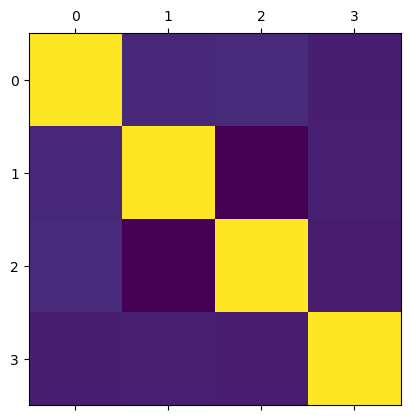

In [48]:
plt.matshow(df_gun.corr())
plt.show()

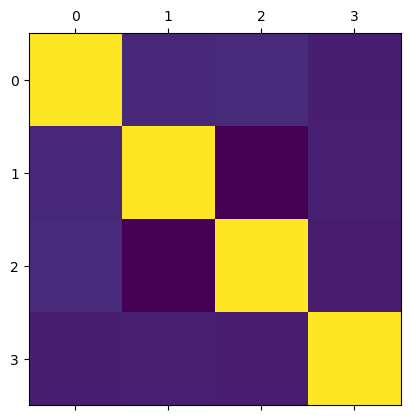

In [50]:
# Save figure
plt.matshow(df_gun.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [52]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Barb\\19-09-2024 Gun Violence Data\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

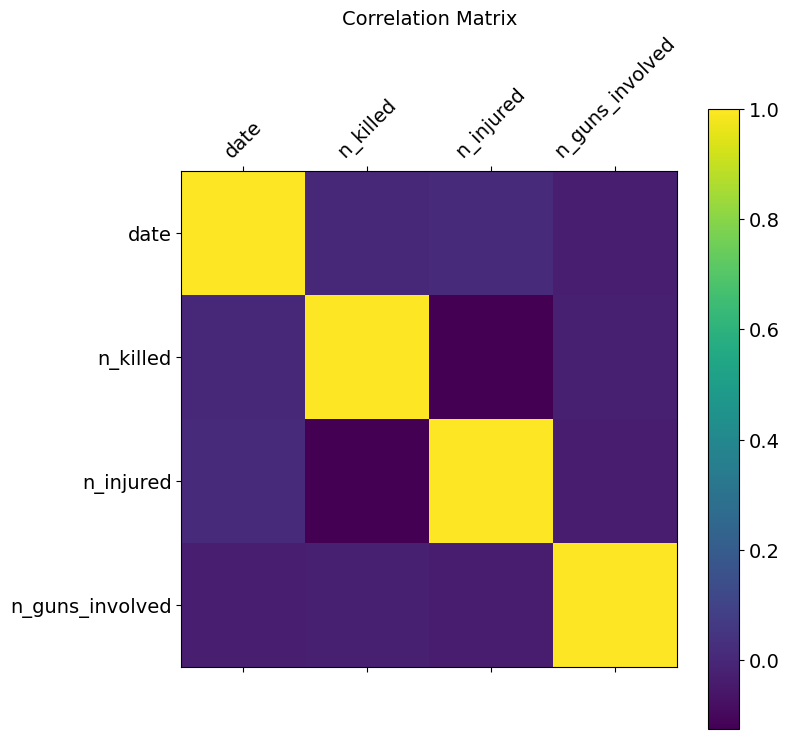

In [54]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_gun.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_gun.shape[1]), df_gun.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_gun.shape[1]), df_gun.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### 3.1.3 Create a correlation heatmap using seaborn:

In [57]:
# Create a subset excluding columns that don't carry any pertinent info
# No need to create a subset



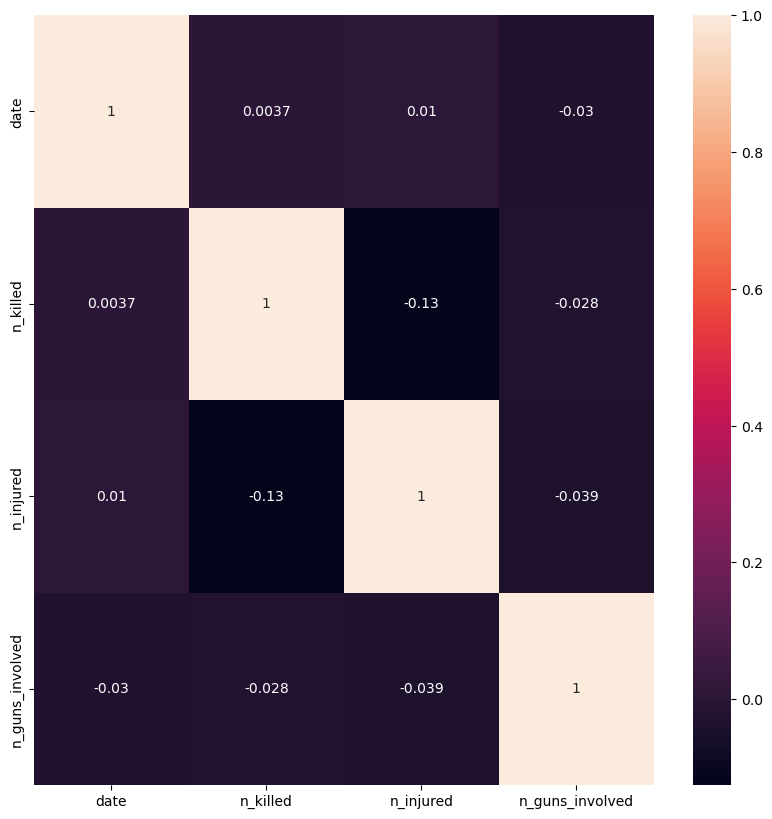

In [59]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_gun.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [61]:
#n_killed with n_guns_involved= -0.028 coefficient indicates a very weak negative relationship. This could be interpreted as
#                      "the greater the number of people killed by gun violence, the fewer guns involved" and vice versa
#n_killed with n_injured= -0.13 coefficient indicates a weak negative relationship. This could be interpreted as
#                      "the greater the number of people killed by gun violence, the fewer the number of people injured by gun violence" and vice versa.
#n_injured with n_guns_involved = -0.039 coefficient indicates a very weak negative relationship. This could be interpreted as
#                      "the greater the number of people injured by gun violence, the fewer guns involved" and vice versa    

### 3.2 Scatterplots

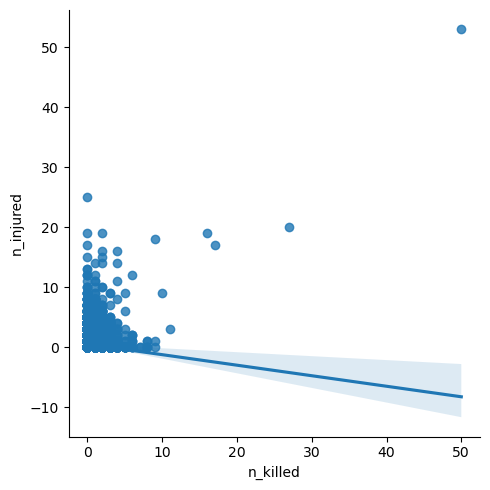

In [64]:
# Create a scatterplot for the "n_killed" and "n_injured" columns in seaborn

sns.lmplot(x = 'n_killed', y = 'n_injured', data = df_gun)

The trend line is not very steep, and it does show a weak negative relationship between the variables.
There are many points far away from this line. There is 1 outlier that is really far from the trend line: n_killed = 50 and n_injured > 50.


### 3.3 Pair Plots

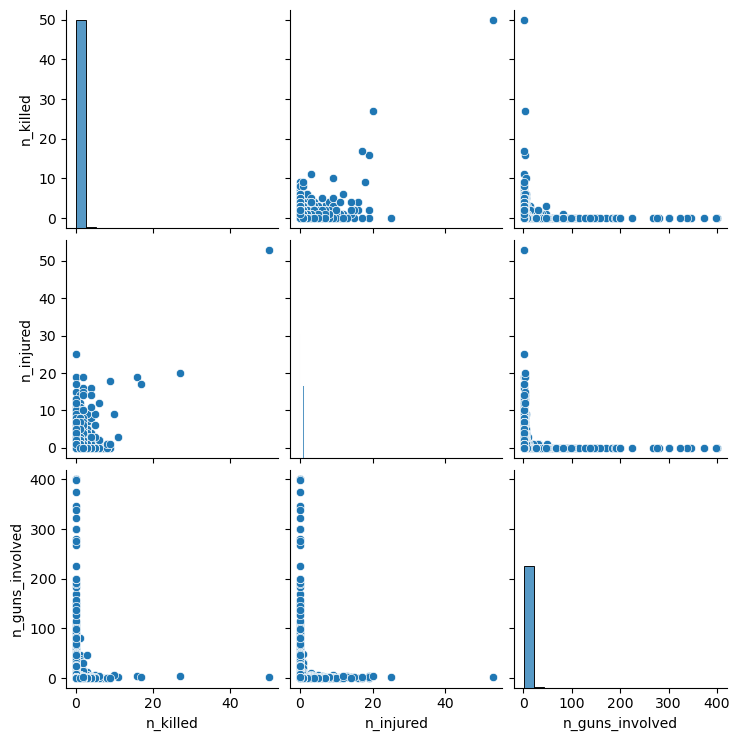

In [66]:
# Create a pair plot 

g = sns.pairplot(df_gun)

Wow, there really is no strong relationship between the variables in any of these pair plots.
However, I will explore the variable "n_killed" more.

### 3.4 Categorical Plots

##### Creating a categorical variable that splits the "n_killed" (# of people killed by gun violence) column into categories

<Axes: xlabel='n_killed', ylabel='Count'>

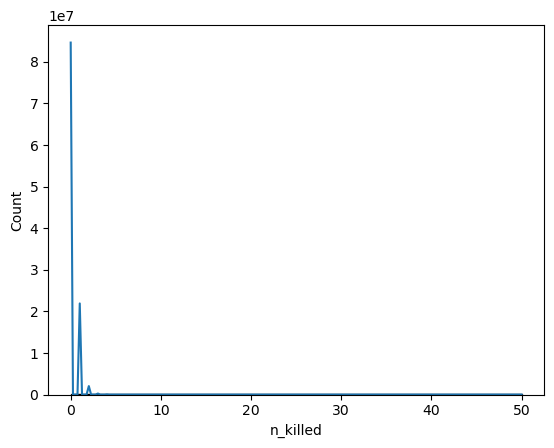

In [68]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the ranges of people killed. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_gun['n_killed'], bins = 1, kde = True)

In [70]:
df_gun.loc[df_gun['n_killed'] ==0, 'Death category'] = 'none'

In [72]:
df_gun.loc[df_gun['n_killed'] ==1, 'Death category'] = '1 killing'

In [74]:
df_gun.loc[df_gun['n_killed'] > 1, 'Death category'] = 'multiple killings'

In [76]:
df_gun['Death category'].value_counts(dropna = False)

Death category
none                 185835
1 killing             48436
multiple killings      5406
Name: count, dtype: int64

In [78]:
df_gun.loc[df_gun['n_injured'] ==0, 'Injured category'] = 'none'

In [80]:
df_gun.loc[df_gun['n_injured'] ==1, 'Injured category'] = '1 injured'

In [82]:
df_gun.loc[df_gun['n_injured'] >1, 'Injured category'] = 'multiple injured'

In [88]:
df_gun['Injured category'].value_counts(dropna = False)

Injured category
none                142487
1 injured            81986
multiple injured     15204
Name: count, dtype: int64

In [110]:
df_gun.loc[df_gun['n_guns_involved'] ==0, 'Gun Number category'] = 'no gun'

In [86]:
df_gun.loc[df_gun['n_guns_involved'] ==1, 'Gun Number category'] = '1 gun'

In [100]:
#df_gun.loc[df_gun['n_guns_involved'] >= 2, 'Gun Number category'] = 'Extreme amount of guns'

In [112]:
df_gun['Gun Number category'].value_counts(dropna = False)

Gun Number category
1 gun            127548
NaN               99451
Multiple guns     12678
Name: count, dtype: int64

In [54]:
df_gun.columns


Index(['date', 'n_killed', 'n_injured', 'n_guns_involved', 'Death category'], dtype='object')

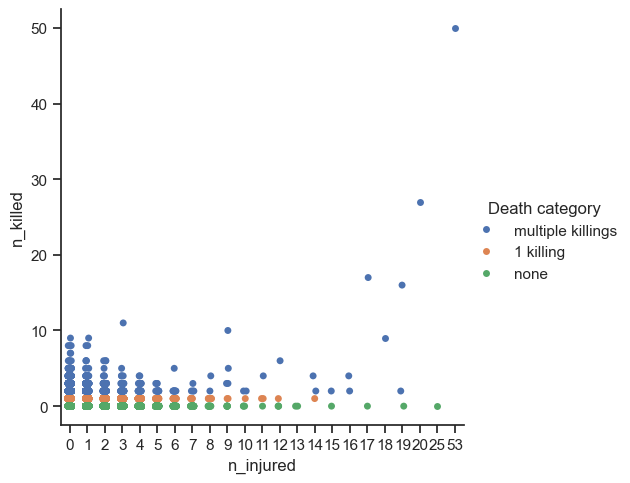

In [55]:
# Create a categorical plot in seaborn using the death categories created above

sns.set(style="ticks")
g = sns.catplot(x="n_injured", y="n_killed", hue="Death category", data=df_gun)

There isn't much relationship between the # killed and the # injured by gun violence.

##### Task 6.2 #7 -Previous Question: How many multiple incidences of gun violence occurred?
#####                                   5406 multiple killings from 2013-2018


##### Task 6.2 #8 - I can't define any hypotheses.

## 4. Export this dataframe with dropped columns as a csv file

In [60]:
# Check shape before exporting
df_gun.shape

(239677, 5)

In [61]:
#Export the updated dataframe as a csv file
df_gun.to_csv(os.path.join(path, '02 Data', 'Prepared', 'df_gun6-2.csv'))